In [1]:
from sklearn.neural_network import MLPClassifier
import pygame 
import numpy as np
import numpy.random as rd

In [63]:
def direction(a):
    b = 1 - a**2
    return np.sqrt(b)

def distance(a,b):
    return np.sqrt((b["x"]-a["x"])**2 + (b["y"]-a["y"])**2)

def findCloseFood(blop,idBlop):
    d1 = w+h,
    d2 = w+h
    f1 = {}
    f2 = {}
    i1 = 0
    i2 = 0
    for f in range(len(food)):
        d = distance(blop,food[f])
        if d < d2:
            if d < d1:
                d1 = d
                f1 = food[f]
                i1 = f
            else:
                d2 = d
                f2 = food[f]
                i2 = f
    blopId[idBlop]['idf1'] = i1
    if f1["x"] > blop["x"]:
        blop["f1x"] = np.cos(f1["x"])
    else:
        blop["f1x"] = -np.cos(f1["x"])
    if f1["y"] > blop["y"]:
        blop["f1y"] = -np.sin(f1["y"])
    else:
        blop["f1y"] = np.sin(f1["y"])
    return blop
    
def findCloseBlop(blop, gen, idBlop):
#     d1 = w+h,
#     d2 = w+h
#     g1 = {}
#     g2 = {}
#     i1 = 0
#     i2 = 0
    
    
#     g2 = gen[0]
#     i2 = 0
    
#     for k in range(len(gen)):
        
        
#         if k != idBlop:
#             d = distance(blop,gen[k])
#             if d <= d2:
#                 if d <= d1:
#                     d1 = d
#                     g1 = gen[k]
#                     i1 = k
#                 else:
#                     d2 = d
#                     g2 = gen[k]
#                     i2 = k
            
#     blopId[idBlop]['ide1'] = i1
#     blop["e1x"] = g1["x"]
#     blop["e1y"] = g1["y"]
#     blop["e1s"] = g1["score"]
#     blopId[idBlop]['ide2'] = i2
#     blop["e2x"] = g2["x"]
#     blop["e2y"] = g2["y"]
#     blop["e2s"] = g2["score"]
    return blop
    

def createFirstGeneration(n,w,h):
    blop = [{} for i in range(n)]
    for j in range(len(blop)):
        blop[j]["x"] = np.floor(rd.rand()*(w/2)+2*(w/4))
        blop[j]["y"] = np.floor(rd.rand()*(h/2)+2*(h/4))
        blop[j]["dx"] = (rd.rand()*2)-1
        blop[j]["dy"] = (2*np.floor(rd.rand()*2) - 1) * direction(blop[j]["dx"])
        blop[j]["score"] = 1
        blop[j]["id"] = j
        
    return blop

def createFood(n,w,h):
    food = [{} for i in range(n)]
    for j in range(len(food)):
        food[j]['x'] = np.floor(w/2)
        food[j]['y'] = np.floor(h/2)
    return food

def createData(n):
    dataX = [[] for i in range(n)]
    
    for i in range(n):
        dd = []
        for a in blop[i]:
            if a != "id":
                dd.append(blop[1][a])
        dataX[i].append(dd)
    dataY = [[np.floor(rd.rand()*3)] for i in range(n)]
    
    return dataX,dataY

def createNN(n):
    nn = []
    for i in range(n):
        nn.append(MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(10,10, 2), random_state=1))
        if generation == 0:
            nn[i].fit(np.array(dataX[i]).reshape(1, -1),np.array(dataY[i]))
        else:
            nn[i].fit(np.array(dataX[i]),np.array(dataY[i]))
    return nn



def moveBlops(blop):
    for i in range(len(blop)):
        if  blop[i]["score"] != 0: 
            #update dx & dy
            if(prediction[i] == 0): #gauche
                if blop[i]['dx'] <= 0:
                    blop[i]['dy'] = blop[i]['dy'] - .1
                    if blop[i]['dy'] < -1:
                        blop[i]['dy'] += .2
                        blop[i]['dx']  = direction(blop[i]['dy'])
                    else:
                        blop[i]['dx'] = -direction(blop[i]['dy'])
                else:
                    blop[i]['dy'] = blop[i]['dy'] + .1
                    if blop[i]['dy'] > 1:
                        blop[i]['dy'] -= .2
                        blop[i]['dx']  = -direction(blop[i]['dy'])
                    else:
                        blop[i]['dx'] = direction(blop[i]['dy'])

            elif(prediction[i] == 2): #droite
                if blop[i]['dx'] <= 0:
                    blop[i]['dy'] = blop[i]['dy'] + .1
                    if blop[i]['dy'] > 1:
                        blop[i]['dy'] -= .2
                        blop[i]['dx']  = direction(blop[i]['dy'])
                    else:
                        blop[i]['dx'] = -direction(blop[i]['dy'])
                else:
                    blop[i]['dy'] = blop[i]['dy'] - .1
                    if blop[i]['dy'] < -1:
                        blop[i]['dy'] += .2
                        blop[i]['dx'] = -direction(blop[i]['dy'])
                    else:
                        blop[i]['dx'] = direction(blop[i]['dy'])

            #move the blop
            blop[i]["x"] = blop[i]["x"] + 2*blop[i]["dx"]
            blop[i]["y"] = blop[i]["y"] + 2*blop[i]["dy"]

            if blop[i]["y"] >= h:
                blop[i]["dy"] = -blop[i]["dy"]
                blop[i]["y"] = h-5
            if blop[i]["y"] <= 0:
                blop[i]["dy"] = -blop[i]["dy"]
                blop[i]["y"] = 5
            if blop[i]["x"] >= w:
                blop[i]["x"] = w - 5
                blop[i]["dx"] = -blop[i]["dx"]
            if blop[i]["x"] <= 0:
                blop[i]["x"] = 5
                blop[i]["dx"] = -blop[i]["dx"]


            #check food
            if distance(blop[i],food[blopId[i]['idf1']]) < 3+3+blop[i]["score"]:
                blop[i]["score"] += .3
                food[blopId[i]["idf1"]]['x'] = np.floor(w/2)
                food[blopId[i]["idf1"]]['y'] = np.floor(h/2)

#             #check enemy

#             if distance(blop[i],blop[blopId[i]["ide1"]]) < (3+3+blop[i]["score"]+blop[blopId[i]["ide1"]]["score"]):

#                 if blop[i]["score"] > blop[blopId[i]["ide1"]]["score"]:
#                     blop[i]["score"] = blop[i]["score"] + blop[blopId[i]["ide1"]]["score"]
#                     blop[blopId[i]["ide1"]]["score"] = 0
#                 elif blop[i]["score"] < blop[blopId[i]["ide1"]]["score"]:
#                     blop[blopId[i]["ide1"]]["score"] += blop[i]["score"] 
#                     blop[i]["score"] = 0

#             blop[i] = findCloseFood(blop[i],i)
            blop[i] = findCloseBlop(blop[i],blop,i)

    return blop

def drawFood(food,s):
    for f in food:
        pygame.draw.circle(s,red,(np.int(f['x']),np.int(f['y'])),3)

def drawBlops(blop,s):
    for b in blop:
        if  b["score"] != 0:
            #if b["id"] < 90:
            pygame.draw.circle(s,green,(np.int(b['x']),np.int(b['y'])),3+int(b['score']))
            #else:
             #   pygame.draw.circle(s,black,(np.int(b['x']),np.int(b['y'])),3+b['score'])
        
def think(blop):
    for i in range(len(blop)):
        infos = []
        for a in blop[i]:
            if a != "id":
                infos.append(blop[1][a])
        if generation == 0:
            prediction[i] = np.floor(rd.rand()*3)
        else:
            prediction[i] = nn[i].predict(np.array(infos).reshape(1, -1))[0]
        if rd.rand(1) > .90:
            prediction[i] = np.floor(rd.rand()*3)
        dataX[i].append(infos)
        dataY[i].append(prediction[i])
    return blop

In [64]:
nbElite = 2
def selectBest(blop):
    newlist = sorted(blop, key=lambda k: k['score'], reverse=True) 
    p = newlist[0:nbElite]
    idp = [];
    for i in range(len(p)):
        idp.append(p[i]["id"])
    newDx = []
    newDy = []
    for i in idp:
        newDy.append(dataY[i])
        newDx.append(dataX[i])
    return newDx, newDy

def reproduction(x,y):
    deX = []
    deY = []
    d1 = int(len(x[0])/2)
    d2 = int(len(x[0]))
    
        
    for k in range(nbIndividu - nbElite):
        i = int(np.floor(rd.rand()*len(x)))
        j = i

        while i == j:
            j = int(np.floor(rd.rand()*len(x)))
        deX.append(x[i][0:d1]+x[j][d1:d2])
        deY.append(y[i][0:d1]+y[j][d1:d2])
        
    return deX,deY

In [65]:

#variable initialisation
# taille bouffe 3 taille initiale 3 + 2*score


w = 250
h = 250
nbIndividu = 10
nbFood = 1

#creation
blop = createFirstGeneration(nbIndividu,w,h)
blopId = [{'idf1':0,'idf2':0,'ide1':0,'ide2':0,} for i in range(nbIndividu)]
food = createFood(nbFood,w,h)
for b in range(len(blop)):
    blop[b] = findCloseFood(blop[b],b)
    blop[b] = findCloseBlop(blop[b],blop,b)
prediction = np.ones(nbIndividu)

dataX,dataY = createData(nbIndividu)
generation = 0
nn = createNN(nbIndividu)




generation 1
global score 13.6
generation 2
global score 10
generation 3
global score 16.6
generation 4
global score 10
generation 5
global score 12.4
generation 6
global score 12.4
generation 7
global score 10
generation 8
global score 10
generation 9
global score 11.2
generation 10
global score 10
generation 11
global score 14.5
generation 12
global score 17.2
generation 13
global score 10
generation 14
global score 10.6
generation 15
global score 13.9
generation 16
global score 10
generation 17
global score 13.6
generation 18
global score 14.2
generation 19
global score 10
generation 20
global score 12.4
generation 21
global score 10
generation 22
global score 12.4
generation 23
global score 12.4
generation 24
global score 10
generation 25
global score 11.8
generation 26
global score 10.9
generation 27
global score 10
generation 28
global score 15.1
generation 29
global score 12.1
generation 30
global score 10
generation 31
global score 12.4
generation 32
global score 10
generation 

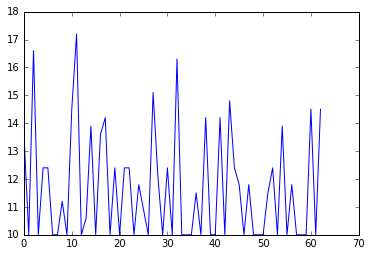

In [66]:
#fenetre

black = (0, 0, 0)
white = (255, 255, 255)
green = (0, 255, 0)
red = (255, 0, 0)

margin = 1
pygame.init()


screen = pygame.display.set_mode([w,h])
 
pygame.display.set_caption("blop army")

# Loop until the user clicks the close button.
done = False
 
# Used to manage how fast the screen updates
clock = pygame.time.Clock()
ii = 0;
# -------- Main Program Loop -----------

scoreMoyen = []
nbTour = 200
while not done:
    ii+=1
    for event in pygame.event.get():  # User did something
        if event.type == pygame.QUIT:  # If user clicked close
            done = True  # Flag that we are done so we exit this loop
        
    # Set the screen background

    
    
    screen.fill(white)
    blop = think(blop)
    blop = moveBlops(blop)
    drawFood(food,screen)
    drawBlops(blop,screen)

    
    if (ii%nbTour) == 0:
        generation += 1
        print "generation "+str(ii/nbTour)
        ss = 0
        bb = sorted(blop, key=lambda k: k['score'], reverse=True) 
        for b in bb[0:20]:
            ss+=b["score"]
        print "global score "+str(ss)
        scoreMoyen.append(ss)
        dataParentsX, dataParentsY  = selectBest(blop)
        dataEnfantsX, dataEnfantsY = reproduction(dataParentsX, dataParentsY)
        
        blop = createFirstGeneration(nbIndividu,w,h)
        
        
        
        blopId = [{'idf1':0,'idf2':0,'ide1':0,'ide2':0,} for i in range(nbIndividu)]
        
        food = createFood(nbFood,w,h)
        
        for b in range(len(blop)):
            blop[b] = findCloseFood(blop[b],b)
            blop[b] = findCloseBlop(blop[b],blop,b)
        
        
        dataX =  dataParentsX + dataEnfantsX
        #+ dMoisiX
        
        
        dataY =  dataParentsY + dataEnfantsY 
        #+ dMoisiY
        

        prediction = np.ones(nbIndividu)
        

        nn = createNN(nbIndividu)
        dataX = [[] for j in range(nbIndividu)]
        dataY = [[] for j in range(nbIndividu)]
       
    
    clock.tick(60)

    pygame.display.flip()
pygame.quit()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scoreMoyen)
plt.show()